# 目次

1. 移流方程式とは（1週目）
  - 移流方程式の一般解について
  - 一般解

2.　離散化手法（1週目～2週目）
 - 差分法の理論とPythonプログラム
  - 後退差分（1次精度）
  - 前進差分（1次精度）
  - 中心差分（2次精度）


- [Pythonの学習用の記事](https://takun-physics.net/%e3%83%97%e3%83%ad%e3%82%b0%e3%83%a9%e3%83%9f%e3%83%b3%e3%82%b0%e5%ad%a6%e7%bf%92/)

## 後退差分（1次精度）

コードをひとつずつ実行しながら理解を深めることにします。

まずは必要なライブラリをインポートします。


- Numpy：数値計算用のライブラリ
- Matplotlib：波の形状を2次元プロットして可視化するためのライブラリ

In [46]:
import numpy as np
import matplotlib.pyplot as plt

実行してエラーがなければ記述に問題はないでしょう。

次に「初期状態の設定」を行います。

数値計算をする際に特に単位は決まっていませんが、流体解析の場合はSI単位系(m-sec-kg)としておくのが良いかと思います。

- 時間刻みは0.25[s]
- 速度c=1[m/s]
- 空間xは「0～10(m)」とし、空間刻みdx=0.1とします。

In [47]:
''' 条件設定 '''
# 時間項の条件
dt = 0.1

# 空間項の条件
dx = 0.1
x_min = 0
x_max = 10

x=[2,5]の範囲をu=1とし、それ以外をu=0にします。

In [48]:
x = np.arange(x_min, x_max, dx)     # 1次元計算格子

# 初期分布uと輸送速度c
u = np.zeros_like(x)
u[int(2/dx):int(5/dx)] = 1
c = 1
# クーラン数の確認
co= c * dt / dx

print(f'クーラン数 = {co}')

クーラン数 = 1.0


今の条件だとクーラン数は1です。

初期状態を確認してみましょう。

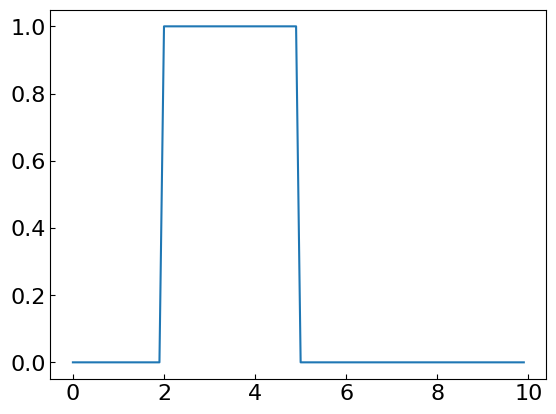

In [49]:
plt.plot(x,u)

In [50]:
u

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 移流方程式を解く

un = u.copy()で初期状態をコピーします。
```
u[j] = un[j] - c * dt / dx * (un[j] - un[j-1])
```
とすることで、
\begin{align*}
u^{n+1}_{j}=u^{n}_{j}-\frac{c\Delta t}{\Delta x}\big(u^{n}_{j}-u^{n}_{j-1}\big)
\end{align*}
を解いています。

In [51]:
step = 40 # 100ステップ計算する

''' 輸送速度が正の1次元移流方程式を数値計算する '''
for i in range(step):
    if i % 10 == 0:
        print('Iteration=', i)
        
    un = u.copy()
    for j in range(1, len(x)-1):
        # 時間項：前進差分/空間項：風上差分
        u[j] = un[j] - c * (dt / dx) * (un[j] - un[j-1])

Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


```python
for j in range(1, len(x)-1):
```
のように、空間の要素を0からではなく1からにしています。

これは、数値計算の途中で「u[j-1]」があるため「u[0]」を用意しておかないとエラーが起こってしまうため「u[0]」を初期状態で設定しておいたのです。
実際に計算で使っている空間領域は「要素の1～len(x)」だけということになります。

※Pythonの配列は基本が[値の参照渡し](https://takun-physics.net/9498/)なので、

```python
un = u
```
とするとuが変更すると同時にu0の値も変わってしまします。

参考記事：[【第3回Python流体の数値計算】「参照渡し」と「値渡し」の違いを理解する。](https://takun-physics.net/9498/)

```python
un = u.copy()
```
とすることで、u0とuは別ものの変数となるので値が勝手に上書きされずに済みます。

以上の数値計算を行っても何の結果も出ないと思いますので最終状態の「u」をMatplotlibで出力してみましょう。

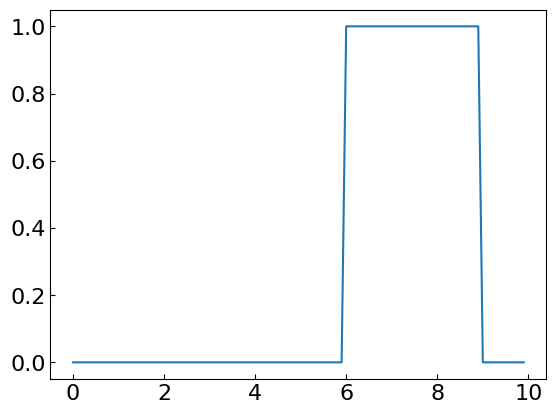

In [52]:
plt.plot(x,u)

初期状態と最終状態（20ステップ後)比較してみましょう。

最終状態(20ステップ後）は既に計算したので、初期状態を再度u_initialという変数名で作ります。

In [53]:
# 初期分布
u_initial = np.zeros_like(x)
u_initial[int(2/dx):int(5/dx)] = 1

では、初期状態と最終状態を比較しましょう。

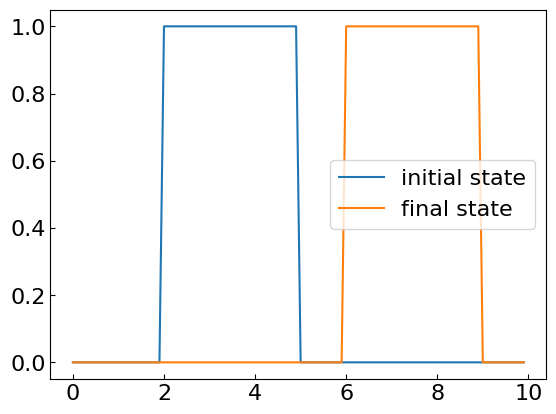

In [54]:
plt.plot(x,u_initial, label="initial state")
plt.plot(x,u, label="final state")
plt.legend()

クーラン数$Co=1$が1の場合は、移流方程式の初期の状態が保ったまま移動していることが確認できます。

その理由はpdfで解説

プログラムを関数にまとめておきましょう。プログラムは意味がある機能ごとにまとめておくことで汎用性が増します。

例えば、今回は以下のように機能ごとにまとめておくとよいでしょう。

- 解析設定
- 初期状態
- 移流方程式の解法
- グラフ化

グラフの作り方は[Pythonで1次元移流方程式を離散化して数値流体力学に入門する](https://watlab-blog.com/2022/08/21/1d-advection/)を参考にしました。

imgフォルダにgifファイルとして1次元移流方程式を解いた結果をアニメーション作成してくれます。

# 移流方程式（後退差分 クーラン数1）のプログラム全体

In [55]:
# 必要なライブラリの設定
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# 初期状態の設定
def initial_state(x_min, x_max, dx):
    x = np.arange(x_min, x_max, dx)     # 1次元計算格子

    # 初期分布uと輸送速度c
    u = np.zeros_like(x)
    u[int(2/dx):int(5/dx)] = 1
    
    return x, u

# 移流方程式の解法
def sol_1d_advection_upwind(x, u, dt, dx, c, step, schems):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j] - un[j-1])
        
        plot(x, u, i, dir_)   
        create_gif(dir_, f'result/001_1d_advection_{schems}.gif') # gifファイルの作成

def plot(x, u, i, dir):
    ''' シミュレーション結果をプロットし画像を保存する '''
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 16
    #plt.rcParams['font.family'] = 'sans-serif'
    #plt.rcParams['font.sans-serif'] = ['MS Gothic']

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure()

    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('u')

    # スケールの設定をする。
    ax1.set_xlim(np.min(x), np.max(x)-1)
    ax1.set_ylim(-0.2, 1.2)

    # プロットを行う。
    ax1.plot(x, u, label='Result', lw=1, color='red')

    # レイアウト設定
    fig.tight_layout()

    # 画像を保存する。
    # dirフォルダが無い時に新規作成
    save_dir = dir
    if os.path.exists(save_dir):
        pass
    else:
        os.mkdir(save_dir)

    # 画像保存パスを準備
    path = os.path.join(*[save_dir, str("{:05}".format(i)) + '.png'])

    # 画像を保存する
    plt.savefig(path)

    # グラフを表示する。
    #plt.show()
    plt.close()
    return

def create_gif(in_dir, out_filename):
    ''' imgフォルダの複数画像からGIF画像を作る '''
    path_list = []
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))  # ファイルパスをソートしてリストする
    imgs = []                                                    # 画像をappendするための空配列を定義

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])                           # 画像ファイルを1つずつ開く
        imgs.append(img)                                         # 画像をappendで配列に格納していく

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=20, loop=0)
    return


if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 1
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_upwind(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems='upwind_co1.0') # シミュレーションの実行

クーラン数 = 1.0
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_upwind_co1.0.gif」をご確認ください。

```python
if __name__ == '__main__':
    (処理内容）
```
という部分がpythonのmainプログラムの部分です。

if文で書かれているのはプログラム自体がmainの実行ファイルかどうかを判定している部分ですが、最初はあまり深く気にしなくても良いです。

クラスやモジュールについて学ぶと理由がわかってきます。
例えば[こちらの記事](【Python初心者】別ファイルの関数やクラスの実行（モジュール化）)でご自身でも勉強してください。

以降、移流方程式の以下の関数の中身を変えることで、差分法の種類を色々と変更することができます。


```python
# 移流方程式の解法
def sol_1d_advection_upwind(x, u, dt, dx, c, step):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j] - un[j-1])
        
        plot(x, u, i, dir_)   
        create_gif(dir_, schems) # シミュレーションの実行) # gifファイルの作成
```

今回は後退差分を行いました。離散化した方程式を解いている部分は、
```python
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j] - un[j-1])
```
です。

## 移流方程式（後退差分 クーラン数0.5）

クーラン数1の場合は、初期状態のまま形を保ったまま右へ移動する数値解となりましたが、クーラン数0.5の場合はどうでしょうか。

先ほどのプログラム全体をコピーしても良いですが、既に関数は実行されているので、メインプログラムの中のクーラン数coの値を1から0.5に変更するだけで可能です。(実際は輸送速度cを0.5倍します)

In [56]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 0.5
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_upwind(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="upwind_co0.5") # シミュレーションの実行

クーラン数 = 0.5
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_upwind_co0.5.gif」をご確認ください。

クーラン数0.5にすると初期状態を保つことができず、少し角がなまっており数値拡散が起こっています。

## 移流方程式（後退差分 クーラン数2.0）

メインプログラムの中のクーラン数coの値を1から2.0に変更するだけで可能です。(実際は輸送速度cを2倍します)

In [57]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 2.0
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_upwind(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="upwind_co2.0") # シミュレーションの実行

クーラン数 = 2.0
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/1d_advection_upwind_co2.0.gif」をご確認ください。

クーラン数2.0にすると初期状態を保つことができず、不安定な解となりました。

以上のように、移流方程式の離散化について以下のことがわかりました。

- クーラン数は1.0以下で安定(pdf「ノイマンの安定性解析」で解説）
- 後退差分（1次精度）はクーラン数1.0以下で安定であるが、変化が大きい部分は数値拡散によって解がなまってしまう。

クーラン数は1.0以下でないと不安定であるということは「ノイマンの安定性解析」よりわかっているので、以後クーラン数は1.0以下で扱う。

※クーラン数1.0だと当たり前の解$u_{n+1}=n_{n}$(形を保ったまま右へ平行移動するだけの解)しか出ないので、クーラン数は0.5にして数値計算することにする。


# 移流方程式（前進差分 クーラン数0.5） 

前進差分は空間ラベルiの微分$\big(\frac{\partial u}{\partial x}\big)_{j}\simeq \frac{u_{j+1}-u_{j}}{\Delta x}$とすることです。

ゆえに前進差分の移流方程式の差分は以下のようになります。

\begin{align*}
u^{n+1}_{j}=u^{n}_{j}-\frac{c\Delta t}{\Delta x}\big(u^{n}_{j+1}-u^{n}_{j}\big)
\end{align*}
を解いています。

移流方程式を解いている関数の部分だけを編集します。

後退差分は、
```python
# 移流方程式の解法
def sol_1d_advection_upwind(x, u, dt, dx, c, step, schems):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j] - un[j-1])
        
        plot(x, u, i, dir_)   
        create_gif(dir_, f'1d_advection_{schems}.gif') # gifファイルの作成
```
でした。

前進差分は関数名sol_1d_advection_forwardDiffという名前にし、移流方程式の差分は以下に変更します。
```python
u[j] = un[j] - c * (dt / dx) * (un[j+1] - un[j])
```

In [58]:
# 移流方程式の差分（陽解法、前進差分）
def sol_1d_advection_forwardDiff(x, u, dt, dx, c, step, schems):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j+1] - un[j])
        
        plot(x, u, i, dir_)   
        create_gif(dir_, f'result/001_1d_advection_{schems}.gif') # gifファイルの作成

再度メインの部分だけを呼び出して前進差分での移流方程式を解きます。

- クーラン数は0.5(輸送速度c=0.5)
- gifファイルの出力ファイル名をforwardDiffにする

In [59]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 0.5
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_forwardDiff(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="forwardDiff_co0.5") # シミュレーションの実行

クーラン数 = 0.5
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_forwardDiff_co0.5.gif」をご確認ください。

後退差分とは違ってクーラン数が1以下であっても不安定であることがわかります。

後退差分も前進差分もテーラー展開の1次の項までの精度であるため、空間微分の離散化としては1次精度です。

移流方程式を陽解法で解こうとした際の安定化条件はクーラン数$co\leq 1$でありますが、波形が輸送する方向によって安定か不安定がわかれます。

試しに、$c<0$として前進差分にプログラムを変えてみてください。$c<0$の場合は前進差分が安定になり、後退差分が不安定になるはずです。

ここまでをまとめると以下のことがわかります。

- 輸送速度が正($c>0$)の時は、クーラン数1以下でかつ後退差分は安定
- 輸送速度が負($c<0$)の時は、クーラン数1以下でかつ前進差分は安定

試しに輸送速度に応じて前進差分と後退差分を切り替えるをプログラムを作ってみましょう。



In [60]:
# 移流方程式の差分（陽解法、前進差分と後退差分を輸送速度の正負によって切り替える）
def sol_1d_advection_forwardAndupwind(x, u, dt, dx, c, step, schems):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - 0.5*(c+abs(c)) * (dt / dx) * (un[j] - un[j-1]) - 0.5*(c-abs(c)) * (dt / dx) * (un[j+1] - un[j])
        
        plot(x, u, i, dir_)   
        create_gif(dir_, f'result/001_1d_advection_{schems}.gif') # gifファイルの作成

### 輸送速度が正($c=0.5$)の場合 

In [61]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 0.5
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_forwardAndupwind(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="forwardAndupwind_co+0.5") # シミュレーションの実行

クーラン数 = 0.5
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_forwardAndupwind_co+0.5.gif」をご確認ください。

こちらは後退差分になるので、当然安定しています。

### 輸送速度が負($c=-0.5$)の場合 

In [62]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = -0.5
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_forwardAndupwind(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="forwardAndupwind_co-0.5") # シミュレーションの実行

クーラン数 = -0.5
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_forwardAndupwind_co-0.5.gif」をご確認ください。

こちらは輸送速度が負なので、後退差分で解くと不安定になるため、前進差分で解く必要があります。

プログラムの内部で前進差分になるためこちらの数値解も安定になります。

つまり、輸送方向によっては前進差分も安定であるということなので、輸送速度に応じて後退差分か前進差分かを切り替えるようなプログラムであれば1次精度である後退差分も前進差分も安定であるということです。（ざっくりとした理解としてこれでよい）

以下余談ですが、今までは時間に対して陽解法である場合の話をしてきました。実は陰解法についてはクーラン数という縛りはなく、1以上でも安定するという無条件安定解となることがあります（ここでは詳しくは触れません。陰解法の場合は反復計算をするため、収束してから次のステップを計算するという特徴があるので安定になります）

# 移流方程式（中心差分 クーラン数0.5）

続いて中心差分についてプログラムを作りましょう。

中心差分は空間ラベルiの微分$\big(\frac{\partial u}{\partial x}\big)_{j}\simeq \frac{u_{j+1}-u_{j-1}}{2\Delta x}$とすることです。

中心差分はテーラー展開の2次の項まで残した空間微分の離散化であるため2次精度です。
一般的にテーラー展開の高次の項まで残している、中心差分は微分に対する離散化としては精度が高いですが、流体力学の移流項$(\boldsymbol{u}\cdot \nabla)\boldsymbol{u}$（今回の移流方程式の$c\frac{\partial u}{\partial x}$)で中心差分を使うと不安定になります。

ゆえに中心差分の移流方程式の差分は以下のようになります。

\begin{align*}
u^{n+1}_{j}=u^{n}_{j}-\frac{c\Delta t}{\Delta x}\frac{u^{n}_{j+1}-u^{n}_{j-1}}{2}
\end{align*}
を解いています。

前進差分のプログラム同様、中心差分は関数名sol_1d_advection_FTCSという名前にし、移流方程式の差分は以下に変更します。
```python
u[j] = un[j] - c * (dt / dx) * (un[j+1] - un[j-1])/2
```

In [63]:
# 移流方程式の差分（陽解法、中心差分）
def sol_1d_advection_FTCS(x, u, dt, dx, c, step, schems):
    dir_ = 'img'
    ''' 輸送速度が正の1次元移流方程式を数値計算する '''
    for i in range(step):
        if i % 10 == 0:
            print('Iteration=', i)

        un = u.copy()
        for j in range(1, len(x)-1):
            # 時間項：前進差分/空間項：風上差分
            u[j] = un[j] - c * (dt / dx) * (un[j+1] - un[j -2])/2
        
        plot(x, u, i, dir_)   
        create_gif(dir_, f'result/001_1d_advection_{schems}.gif') # gifファイルの作成

では、中心差分のプログラムを実行しましょう。

以下のようにメインプログラムの中の移流方程式を解く関数を中心差分に変更します。

In [64]:
if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''
    # 時間項の条件
    dt = 0.1

    # 空間項の条件
    dx = 0.1
    x_min = 0
    x_max = 10
    
    c = 0.5
    # クーラン数の確認
    co= c * dt / dx

    print(f'クーラン数 = {co}')

    x, u = initial_state(x_min, x_max, dx) #初期状態
    sol_1d_advection_FTCS(x=x, u=u, dt=dt, dx=dx, c=c, step=40, schems="FTCS_co0.5") # シミュレーションの実行

クーラン数 = 0.5
Iteration= 0
Iteration= 10
Iteration= 20
Iteration= 30


アニメーションの結果は「result/001_1d_advection_FTCS_co0.5.gif」でご確認ください。

中心差分は空間微分の離散化に対しては2次精度であるにも関わらず、移流方程式の解として不安定であることがわかります。

# まとめ

第一回では1次元の移流方程式に対して、時間に対しては陽解法で解き、空間微分に対しては後退差分、前進差分、中心差分でプログラムを作成し数値解の挙動を確かめました。

わかったこととして以下のことが挙げられます。

- 時間に対して陽解法である場合、クーラン数は1以下で安定である。
- 輸送速度が正($c>0$)の場合は、後退差分が安定である。ただし、空間変化が大きい部分では解がなまってしまう
- 空間微分の離散化に対して2次精度である中心差分は解としては振動してしまい不安定である。

ここから、ざっくりと以下の事が言えます。

- 移流方程式の1次精度は安定である。ただし、シャープな変化は取らることができず拡散する
- 2次精度（高次精度）は不安定で解が振動しやすい。ただし、（今後わかるが）高次精度はシャープな変化は捉えようとする。

つまり、安定だが拡散してしまう1次精度をとるか、シャープな変化をとらえられるが不安定で振動してしまう2次精度の解法のどちらを取るかという問題になります。